# Image classification - Fashion MNIST

#### Horatiu Andrei Palaghiu - University of Padova

In this project we plan to explore different methods of classification for the Fashion-MINST dataset and improve on each of them with different techniques. Then we compare said methods to see which one of them provides better results.

In [ ]:
#@title Here we Import the necessary libraries

#Basic libraries
import numpy as np
from numpy import mean
from numpy import std
import tensorflow as tf

#Importing the dataset
from keras.datasets import fashion_mnist

#CNN libraries:
import tensorflow as tf #the backend used by Keras (there are different beckend)
from tensorflow.keras.models import Sequential #import the type of mpdel: sequential (e.g., MLP)
from tensorflow.keras.layers import Input, Dense #simple linear layer
from keras.layers import Conv2D
from keras.layers import MaxPooling2D #we try working with filters that work best on greyscale images to improve accuracy
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras.utils import to_categorical # transformation for classification labels
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD  #we try tweaking the optimizer to see the effects on our results
from keras.utils.vis_utils import plot_model


#For setting the random seed
from tensorflow.python.framework.random_seed import set_random_seed

#Libraries for KNN
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Model evaluation libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#Decision Tree, Random Forest Classifier and SVC libraries 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,accuracy_score, classification_report

#Plotting libraries
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model


#  Loading function
  We chose to import the dataset as images in order to be able to experiment with different filters that we found and thought might be useful. 
  Furthermore, we preprocessed the data inside the loading function by converting all the values into floats rescaled into [0,1] for faster computation. Thus, all the images become 28x28 matrices with values ranging from 0 to 1.

In [ ]:
def load_fashion_mnist(): #loading function
  (X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
  X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))#load the images and reshape them
  X_train = X_train.astype('float32')
  X_train = X_train/255.0
  X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
  X_test = X_test.astype('float32')
  X_test = X_test/255.0
  return X_train, Y_train, X_test, Y_test


In [ ]:
#here we actually load the data and check for the desired shape
X_train, Y_train, X_test, Y_test = load_fashion_mnist()
num_classes = 10 # i.e 10 types of clothing items
Y_train_cat = to_categorical(Y_train, num_classes)
Y_test_cat = to_categorical(Y_test, num_classes)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)



(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


# KNN model
First we implement a K-NN model and try experimenting with different values of k. Given the nature of our data, we will use the Euclidean matrix as metric.

In [ ]:
#first, we flatten our data into a vector
X_trainval = X_train.reshape(len(Y_train), 784)
X_test0 = X_test.reshape(len(Y_test), 784)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
X_train0,X_val,Y_train0,Y_val=train_test_split(X_trainval,Y_train,test_size=0.2,shuffle=True)
print(X_train0.shape, Y_train0.shape, X_val.shape, Y_val.shape)


(60000, 28, 28, 1) (60000,) (10000, 784) (10000,)
(48000, 784) (48000,) (12000, 784) (12000,)


We try 5 very different values of k, including the extreme cases, to check around which one we should insist more for a better model. 

In [ ]:
#we make two lists for the accuracy values for train and test
accuracy_values_train = []
accuracy_values_val= []
k_values = [1, 10, 100, 1000]

In [ ]:
#for each of the values of k, we fit a KNN model on the train set and print the accuracy values
for k in k_values:
  modelknn = KNeighborsClassifier(k)
  modelknn.fit(X_train0, Y_train0)
  Y_pred_train = modelknn.predict(X_train0)
  Y_pred_val = modelknn.predict(X_val)
  accuracy_values_train.append(accuracy_score(Y_pred_train, Y_train0))
  accuracy_values_val.append(accuracy_score(Y_pred_val, Y_val))
print(accuracy_values_val, accuracy_values_train)

[0.85175, 0.8578333333333333, 0.8255833333333333, 0.7630833333333333] [1.0, 0.8745, 0.8186666666666667, 0.7556458333333333]


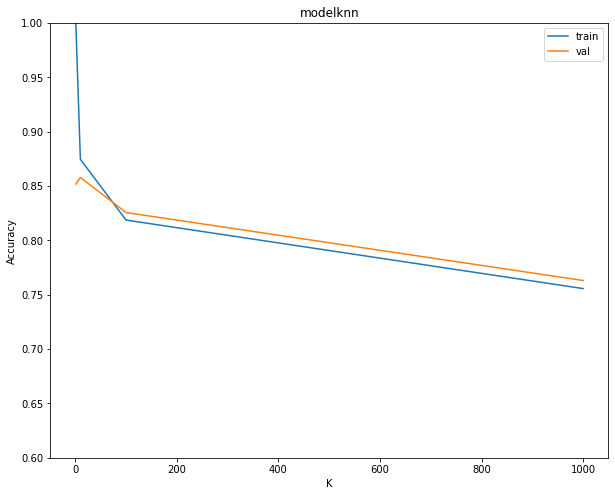

In [ ]:
#we plot the accuracy values on train and val with respect to K for better vizualization
fig = plt.figure(figsize=(10,8))
plt.plot(k_values, accuracy_values_train, label="train")
plt.plot(k_values, accuracy_values_val, label="val")
plt.title('modelknn')

plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.ylim(0.6, 1)

plt.show()

The k that provides better results will probably reside around k=10 so we test the values around that for improvement.

In [ ]:
k_improved = [6, 8, 10, 12, 14]
accuracy_values_train_improved = []
accuracy_values_val_improved = []
for k in k_improved:
  model2knn = KNeighborsClassifier(k)
  model2knn.fit(X_train0, Y_train0)
  Y_pred_train_improved = model2knn.predict(X_train0)
  Y_pred_val_improved = model2knn.predict(X_val)
  accuracy_values_train_improved.append(accuracy_score(Y_pred_train_improved, Y_train0))
  accuracy_values_val_improved.append(accuracy_score(Y_pred_val_improved, Y_val))
print(accuracy_values_val_improved, accuracy_values_train_improved)

[0.8528333333333333, 0.8509166666666667, 0.8495, 0.8478333333333333, 0.84775] [0.8920416666666666, 0.8824166666666666, 0.87675, 0.8707916666666666, 0.8666666666666667]


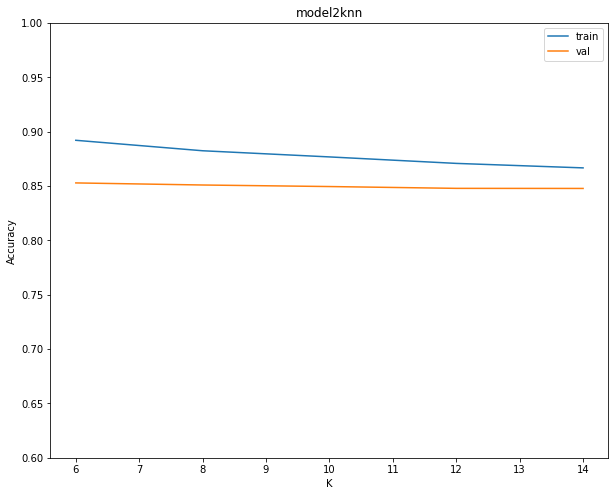

In [ ]:
#we plot the accuracy values on train and test with respect to k_improved
fig = plt.figure(figsize=(10,8))
plt.plot(k_improved, accuracy_values_train_improved, label="train")
plt.plot(k_improved, accuracy_values_val_improved, label="val")
plt.xlabel("K")
plt.title('model2knn')

plt.ylabel("Accuracy")
plt.legend()
plt.ylim(0.6, 1)

plt.show()

As we can see the best k value is 8. It prevents also a bit of overfitting


In [ ]:
y_test_predknn=model2knn.predict(X_test0)

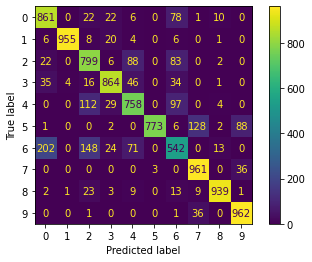

In [ ]:
matrix2knn = confusion_matrix(Y_test, y_test_predknn)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix1knn)

disp.plot()

plt.show()

In [ ]:
print(f"Model2knn:\tTrain:{accuracy_score(Y_train0, Y_pred_train_improved,):.4f}\tTest:{accuracy_score(Y_test, y_test_predknn,):.4f}")

Model2knn:	Train:0.8667	Test:0.8414


# DECISION TREE

Now we implement a Decision Tree model using a gridsearcher algorithm that searchs over specified parameter values for the estimator.


In [ ]:
dt_grid_params = {
    'criterion': ['entropy','gini'],
    'max_depth': ( 5, 10)}
dt_model0=DecisionTreeClassifier()
dt_searcher=GridSearchCV(dt_model0,dt_grid_params,n_jobs=-1,verbose=1)

In [ ]:
dt_searcher.fit(X_train0,Y_train0)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


KeyboardInterrupt: ignored

In [ ]:
dt_searcher.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10)

The parameters found by the GridSearcherCV that best fit the dataset for the Decision Tree are 10 for the max_depth and entropy as the function that measures the quality of the split.

In [ ]:
y_train_preddt=dt_searcher.predict(X_train0)
y_test_preddt=dt_searcher.predict(X_test0)

In [ ]:
print(f"dt_searcher.v1:\tTrain:{accuracy_score(Y_train0, y_train_preddt,):.4f}\tVal:{accuracy_score(Y_test, y_test_preddt,):.4f}")


dt_searcher.v1:	Train:0.8444	Val:0.8021


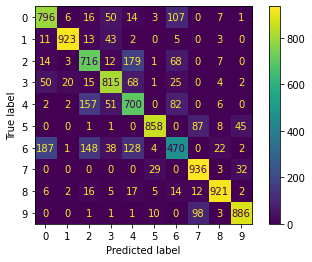

In [ ]:
matrixdt = confusion_matrix(Y_test, y_test_preddt)
disp = ConfusionMatrixDisplay(confusion_matrix=matrixdt)

disp.plot()

plt.show()

#RANDOM FOREST


In [ ]:
rf_grid_params = { 
    'n_estimators': (5, 10, 20,50),
    'criterion': ['entropy','gini'],
    'max_depth':(None, 3, 5, 10,20)}


rf_model4 = RandomForestClassifier()
rf_v1 = GridSearchCV(rf_model4, rf_grid_params, n_jobs= -1, cv = 5)
rf_v1.fit(X_train0, Y_train0)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': (None, 3, 5, 10, 20),
                         'n_estimators': (5, 10, 20, 50)})

In [ ]:
print(rf_v1.best_estimator_)

RandomForestClassifier(criterion='entropy', n_estimators=50)


The parameters found by the GridSearcherCV that best fit the dataset for the Random forest are 20 for the max_depth,entropy as the function that measures the quality of the split and 50 as the numbers of decision tress.

In [ ]:
y_train_predrf=rf_v1.predict(X_train0)
y_test_predrf=rf_v1.predict(X_test0)

In [ ]:
print(f"rf.v1:\tTrain:{accuracy_score(Y_train0, y_train_predrf,):.4f}\tTest:{accuracy_score(Y_test, y_test_predrf,):.4f}")


rf.v1:	Train:0.9999	Test:0.8740


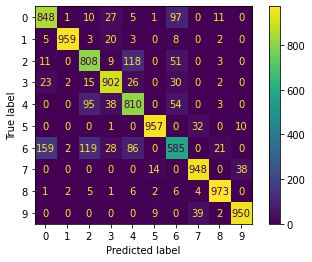

In [ ]:
matrixrf= confusion_matrix(Y_test, y_test_predrf)
disp = ConfusionMatrixDisplay(confusion_matrix=matrixrf)

disp.plot()

plt.show()

# CNN model
Now we try to create a simple C-NN and make adjustments to see if we get an improvement on accuracy.

In [ ]:
np.random.seed(123)
set_random_seed(2)

feature_vector_length = 784
num_classes = 10
Y_train_cat = tf.one_hot(Y_train, num_classes)

model0 = Sequential() #we first define how the "model" looks like
model0.add(Flatten())
model0.add(Dense(input_dim = feature_vector_length, units=feature_vector_length , activation='relu',)) #input layer
model0.add(Dense(units = 20, activation = 'relu'))
model0.add(Dense(num_classes, activation='softmax')) #output layer
es = EarlyStopping(monitor='val_loss',
                   mode='min', 
                   patience = 3, 
                   verbose=1)

model0.compile(loss='categorical_crossentropy', 
    optimizer='sgd',  
    metrics=['accuracy']) 

history0 = model0.fit(X_train, Y_train_cat, epochs=500, batch_size=32, verbose=1, validation_split=0.1,callbacks=es)

Epoch 1/500
1688/1688 [==============================] - 11s 6ms/step - loss: 0.7579 - accuracy: 0.7423 - val_loss: 0.5235 - val_accuracy: 0.8172
Epoch 2/500
1688/1688 [==============================] - 10s 6ms/step - loss: 0.5005 - accuracy: 0.8251 - val_loss: 0.5436 - val_accuracy: 0.7957
Epoch 3/500
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4528 - accuracy: 0.8424 - val_loss: 0.4281 - val_accuracy: 0.8460
Epoch 4/500
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4244 - accuracy: 0.8517 - val_loss: 0.4266 - val_accuracy: 0.8470
Epoch 5/500
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4019 - accuracy: 0.8590 - val_loss: 0.4087 - val_accuracy: 0.8557
Epoch 6/500
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3838 - accuracy: 0.8656 - val_loss: 0.4255 - val_accuracy: 0.8537
Epoch 7/500
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3693 - accuracy: 0.8700 - val_loss: 0.4179 -

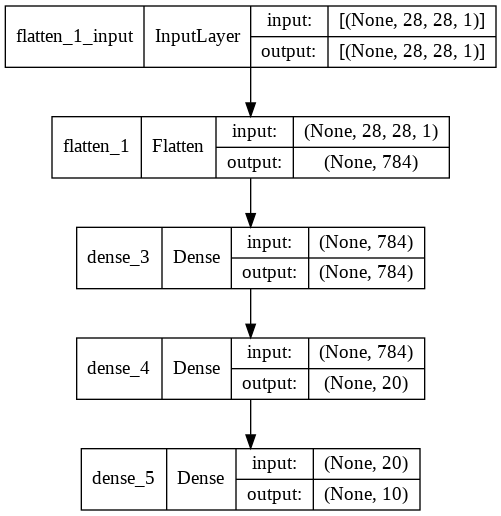

In [ ]:
plot_model(model0, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#predicted values for out train and test models, respectively
y_train_pred0=((np.around(model0.predict(X_train))))
y_test_pred0=((np.around(model0.predict(X_test))))
y_train_pred0=np.argmax(y_train_pred0,axis=1)
y_test_pred0=np.argmax(y_test_pred0,axis=1)



print(classification_report(Y_test,y_test_pred0,))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71      1000
           1       0.99      0.96      0.98      1000
           2       0.82      0.79      0.80      1000
           3       0.94      0.79      0.86      1000
           4       0.79      0.80      0.80      1000
           5       0.97      0.96      0.96      1000
           6       0.68      0.71      0.70      1000
           7       0.93      0.96      0.95      1000
           8       0.98      0.95      0.96      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
print(f"Model0:\tTrain:{accuracy_score(Y_train, y_train_pred0,):.4f}\tTest:{accuracy_score(Y_test, y_test_pred0,):.4f}")


Model0:	Train:0.9032	Test:0.8657


As the accuracy score on the test split of the data shows we can say that we have pretty nice results.

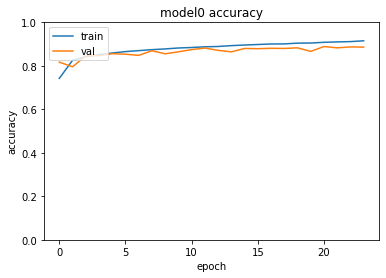

In [ ]:
# summarize history for loss
plt.plot(history0.history['accuracy'])
plt.plot(history0.history['val_accuracy'])
plt.title('model0 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

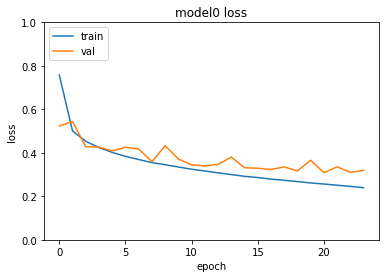

In [ ]:
# summarize history for loss
plt.plot(history0.history['loss'])
plt.plot(history0.history['val_loss'])
plt.title('model0 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

Now we discovered that for improving our model we can use convolutional filters. First we experiment with one Conv2D layer with 32 filters, which looks for 3x3 features.
Then we implemented a pooling layer in order to only sent the important data to next layers, while reducing the amount of needed computation.

In [ ]:


model2 = Sequential() #we first define how the "model" looks like
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(units = 128, activation = 'relu'))
model2.add(Dense(units = 20, activation = 'relu'))
model2.add(Dense(10, activation='softmax')) #output layer
es = EarlyStopping(monitor='val_loss', #quantity to be monitored
                   mode='min', #we look for decreasing patterns stop 
                   patience = 3, #number of epochs with no improvement
                   verbose=1)
sgd2 = SGD(learning_rate=0.01, momentum=0.5)
# Configure the model and start training
model2.compile(loss='categorical_crossentropy', #loss metric
    optimizer=sgd2,  #optimizer
    metrics=['accuracy']) #displayed metric

history2 = model2.fit(X_train, Y_train_cat, epochs=50, batch_size=32, verbose=1, validation_split=0.2,callbacks=es)


Epoch 1/50
1500/1500 [==============================] - 35s 23ms/step - loss: 0.5590 - accuracy: 0.8027 - val_loss: 0.4055 - val_accuracy: 0.8554
Epoch 2/50
1500/1500 [==============================] - 33s 22ms/step - loss: 0.3593 - accuracy: 0.8728 - val_loss: 0.3519 - val_accuracy: 0.8704
Epoch 3/50
1500/1500 [==============================] - 36s 24ms/step - loss: 0.3097 - accuracy: 0.8892 - val_loss: 0.3265 - val_accuracy: 0.8812
Epoch 4/50
1500/1500 [==============================] - 39s 26ms/step - loss: 0.2780 - accuracy: 0.8997 - val_loss: 0.3039 - val_accuracy: 0.8916
Epoch 5/50
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2534 - accuracy: 0.9079 - val_loss: 0.2815 - val_accuracy: 0.8982
Epoch 6/50
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2332 - accuracy: 0.9159 - val_loss: 0.2682 - val_accuracy: 0.9062
Epoch 7/50
1500/1500 [==============================] - 43s 29ms/step - loss: 0.2181 - accuracy: 0.9212 - val_loss: 0.2635 -

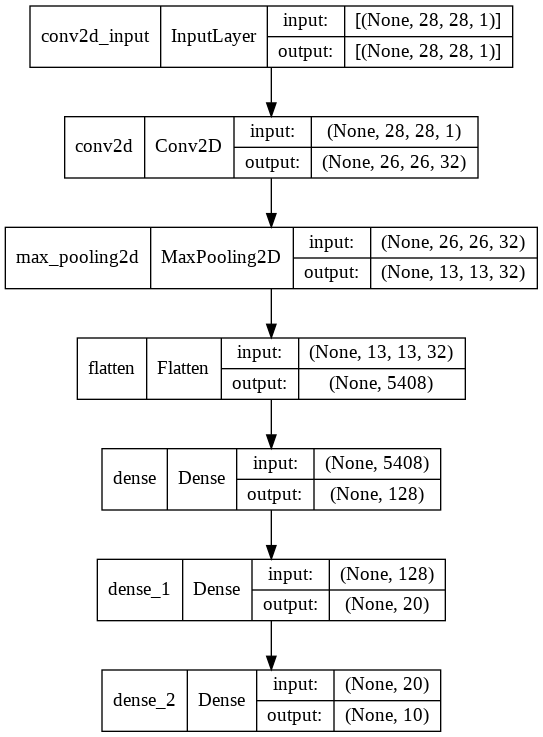

In [ ]:
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Now we run some diagnosis on mour model

In [ ]:
#predicted values for out train and test models, respectively
y_train_pred2=((np.around(model2.predict(X_train))))
y_test_pred2=((np.around(model2.predict(X_test))))
y_train_pred2=np.argmax(y_train_pred2,axis=1)
y_test_pred2=np.argmax(y_test_pred2,axis=1)

In [ ]:
#we make a classification report

print(classification_report(Y_test,y_test_pred2,))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.89      0.84      1000
           3       0.90      0.92      0.91      1000
           4       0.92      0.76      0.83      1000
           5       0.99      0.96      0.97      1000
           6       0.81      0.68      0.74      1000
           7       0.95      0.95      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.94      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
print(f"Model2:\tTrain:{accuracy_score(Y_train, y_train_pred2,):.4f}\tTest:{accuracy_score(Y_test, y_test_pred2,):.4f}")


Model2:	Train:0.9384	Test:0.8980


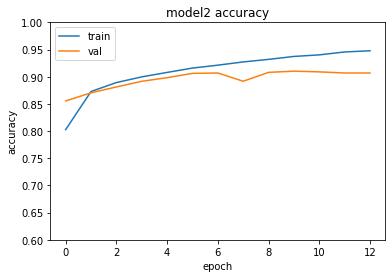

In [ ]:
# summarize history for loss
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim(0.6, 1)
plt.show()



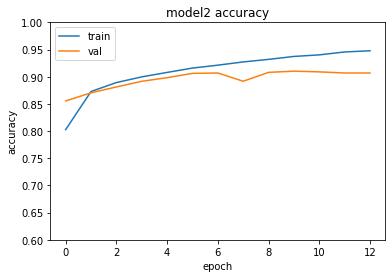

In [ ]:
# summarize history for loss
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim(0.6, 1)
plt.show()

In [ ]:
model3 = Sequential() #we first define how the "model" looks like glorot_normal o glorot_uniform
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(64, (3, 3), activation='relu',padding='same', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(128, (3, 3), activation='relu', padding= 'same', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model3.add(Flatten())
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dropout(0.3))
model3.add(Dense(units = 20, activation = 'relu'))
model3.add(Dense(10, activation='softmax')) #output layer
es = EarlyStopping(monitor='val_loss', #quantity to be monitored
                   mode='min', #we look for decreasing patterns stop 
                   patience = 3, #number of epochs with no improvement
                   verbose=1)
sgd2 = SGD(learning_rate=0.05, momentum=0.5)
# Configure the model and start training
model3.compile(loss='categorical_crossentropy', #loss metric
    optimizer=sgd2,  #optimizer
    metrics=['accuracy']) #displayed metric

history3 = model3.fit(X_train, Y_train_cat, epochs=50, batch_size=32, verbose=1, validation_split=0.2,callbacks=es)

Epoch 1/50
1500/1500 [==============================] - 106s 70ms/step - loss: 0.6363 - accuracy: 0.7576 - val_loss: 0.3749 - val_accuracy: 0.8622
Epoch 2/50
1500/1500 [==============================] - 105s 70ms/step - loss: 0.3877 - accuracy: 0.8600 - val_loss: 0.3077 - val_accuracy: 0.8869
Epoch 3/50
1500/1500 [==============================] - 105s 70ms/step - loss: 0.3328 - accuracy: 0.8790 - val_loss: 0.2772 - val_accuracy: 0.8981
Epoch 4/50
1500/1500 [==============================] - 104s 70ms/step - loss: 0.3026 - accuracy: 0.8898 - val_loss: 0.2603 - val_accuracy: 0.9048
Epoch 5/50
1500/1500 [==============================] - 105s 70ms/step - loss: 0.2823 - accuracy: 0.8966 - val_loss: 0.2847 - val_accuracy: 0.8935
Epoch 6/50
1500/1500 [==============================] - 105s 70ms/step - loss: 0.2643 - accuracy: 0.9027 - val_loss: 0.2383 - val_accuracy: 0.9102
Epoch 7/50
1500/1500 [==============================] - 104s 70ms/step - loss: 0.2525 - accuracy: 0.9052 - val_loss: 0

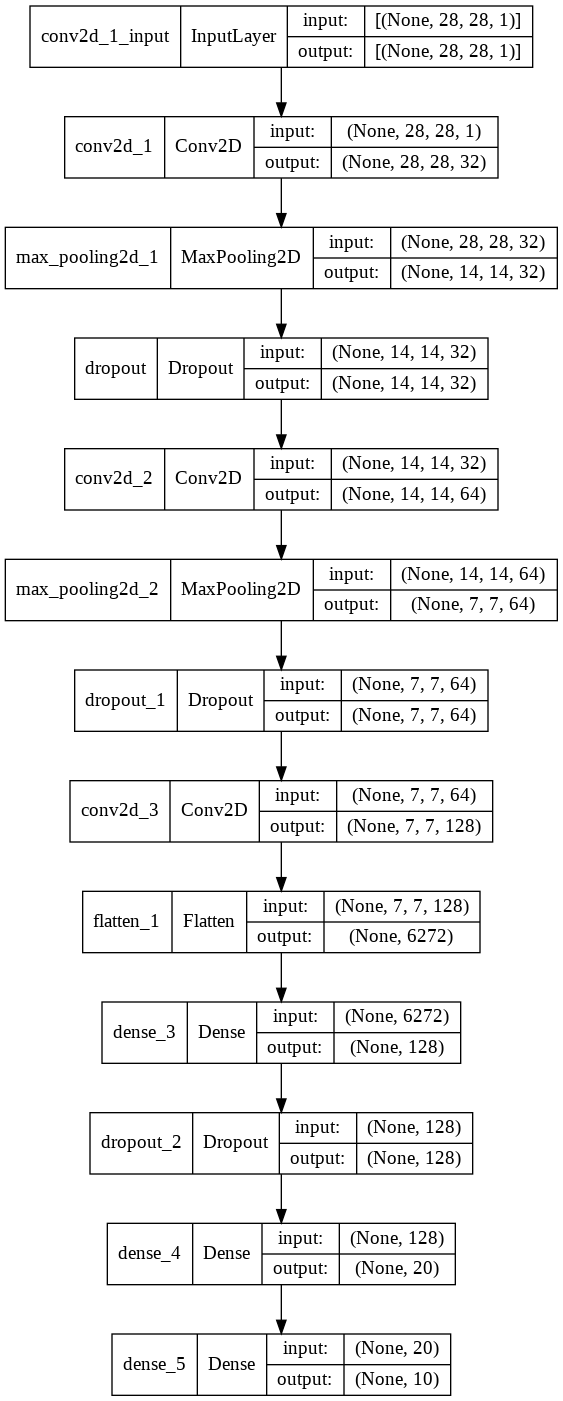

In [ ]:
plot_model(model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#predicted values for out train and test models, respectively
y_train_pred3=((np.around(model3.predict(X_train))))
y_test_pred3=((np.around(model3.predict(X_test))))
y_train_pred3=np.argmax(y_train_pred3,axis=1)
y_test_pred3=np.argmax(y_test_pred3,axis=1)


In [ ]:
#we make a classification report

print(classification_report(Y_test,y_test_pred3,))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83      1000
           1       1.00      0.98      0.99      1000
           2       0.84      0.90      0.87      1000
           3       0.91      0.93      0.92      1000
           4       0.90      0.77      0.83      1000
           5       0.99      0.98      0.99      1000
           6       0.77      0.71      0.74      1000
           7       0.96      0.98      0.97      1000
           8       0.99      0.98      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
print(f"Model3:\tTrain:{accuracy_score(Y_train, y_train_pred3,):.4f}\tTest:{accuracy_score(Y_test, y_test_pred3,):.4f}")


Model3:	Train:0.9390	Test:0.9097


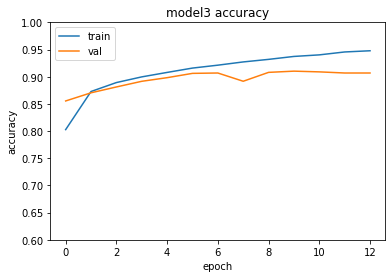

In [ ]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim(0.6, 1)
plt.show()

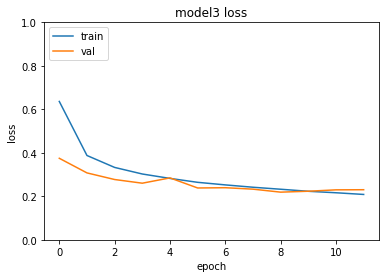

In [ ]:
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

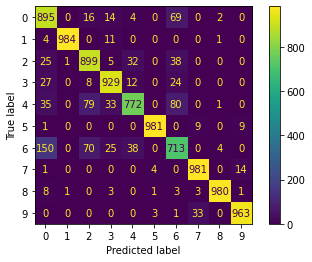

In [ ]:
# we look at the confusion matrix to check which classes are the most misinterpreted
matrix = confusion_matrix(Y_test, y_test_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()
plt.show()

The clothes that are the most mislabeled by model3 belong to the classes: 0 (T-shirt/top), 4 (Coat) and 6 (Shirt). As expected the model misclassifies the items that are more similar to each other in real life, so we can see how the T-shirts (label 0) and Shirts (label 6) can be confused even by a human.